# Simple LSTM to Predict Next Digit

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [38]:
X = np.array(data, dtype=float)
y = np.array(target, dtype=float)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=4)

In [82]:
## RNN model
model = Sequential()
model.add(LSTM((50),batch_input_shape = (None,5,1), return_sequences = True))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(1))

In [83]:
model.compile(loss="mean_absolute_error",
             optimizer = "adam",
             metrics = ["accuracy"])


In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 50)             10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0500
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0500
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0500
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0500
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0500
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0500
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0500

In [90]:
results = model.predict(x_test)

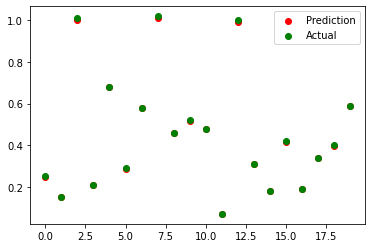

In [94]:
plt.scatter(range(20),results,c = "r",label="Prediction")
plt.scatter(range(20),y_test,c="g",label="Actual")
plt.legend()
plt.show()

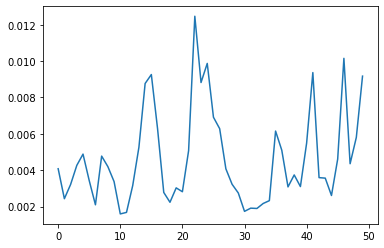

In [92]:
plt.plot(history.history["loss"])
plt.show()

# LSTM to predict univariate Time series data

In [95]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [170]:
import random
data = []
for i in range(0,100):
    data.append(random.randint(1,100))
print(len(data))

100


In [244]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,110,120,130,140,150,160,170,180,190,200]
n_steps = 3
def prepare_data(data, n_steps):
    X, y =[], []
    for i in range(len(data)):
        if i+n_steps < len(data):
            seq_x = data[i:i+n_steps]
            seq_y = data[i+n_steps]
            X.append(seq_x)
            y.append(seq_y)
    return X,y
X,y = prepare_data(data,n_steps)

In [245]:
for i in range(len(X)):
    print(X[i],y[i])

[10, 20, 30] 40
[20, 30, 40] 50
[30, 40, 50] 60
[40, 50, 60] 70
[50, 60, 70] 80
[60, 70, 80] 90
[70, 80, 90] 100
[80, 90, 100] 110
[90, 100, 110] 120
[100, 110, 120] 130
[110, 120, 130] 140
[120, 130, 140] 150
[130, 140, 150] 160
[140, 150, 160] 170
[150, 160, 170] 180
[160, 170, 180] 190
[170, 180, 190] 200


In [230]:
X = np.array(X)
y = np.array(y)

In [232]:
## reshape from 2D to 3D as LSTM takes 3D as input - [samples, timesteps] -> [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#print(X)

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=4)
print(x_train.shape)
print(n_features)
#print(y)

(13, 3, 1)
1


In [234]:
## LSTM model
model = Sequential()
model.add(LSTM(50,activation = "relu", return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation = "relu", return_sequences =True))
model.add(LSTM(50,activation = "relu", return_sequences =True))
model.add(LSTM(50,activation = "relu"))
model.add(Dense(1))

In [235]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 3, 50)             10400     
_________________________________________________________________
lstm_35 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
lstm_36 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
lstm_37 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.compile(loss="mean_absolute_error",
             optimizer = "adam",
             metrics = ["accuracy"])


In [237]:
history = model.fit(x_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 124.0125 - accuracy: 0.0000e+00 - val_loss: 126.5943 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 123.9277 - accuracy: 0.0000e+00 - val_loss: 126.5193 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 123.8512 - accuracy: 0.0000e+00 - val_loss: 126.4423 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 123.7706 - accuracy: 0.0000e+00 - val_loss: 126.3456 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 26ms/step - loss: 123.6687 - accuracy: 0.0000e+00 - val_loss: 126.2182 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 123.5316 - accuracy: 0.0000e+00 - val_loss: 126.0509 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 123.3530 - accurac

In [238]:
results = model.predict(x_test)

In [257]:
#print(x_test)
yhat = model.predict(np.array([190,200,210]).reshape(1,3,1))
print(yhat)

[[220.67876]]


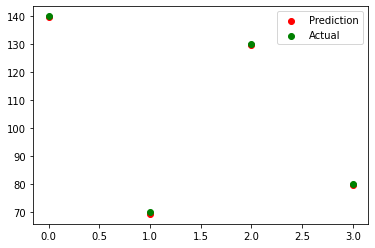

In [255]:
plt.scatter(range(len(x_test)),results,c = "r",label="Prediction")
plt.scatter(range(len(x_test)),y_test,c="g",label="Actual")
plt.legend()
plt.show()

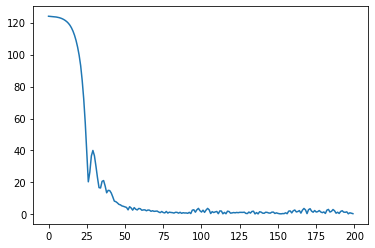

In [256]:
plt.plot(history.history["loss"])
plt.show()

# LSTM to predict Multivariate Time series Data

In [258]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import random

In [296]:
dim1 = [random.randint(1,100) for i in range(100)]
dim2 = [random.randint(1,100) for i in range(100)]
#print(dim1, dim2)

In [332]:
n_steps = 3
target = [dim1[i]+dim2[i] for i in range(len(dim1))]

dim1 = np.array(dim1).reshape((len(dim1),1))
dim2 = np.array(dim2).reshape((len(dim2),1))
target = np.array(target).reshape(len(target),1)

data = np.hstack((dim1,dim2,target))
#print((data))


In [300]:
def prepare_data(data, n_steps):
    X,y = [], []
    for i in range(len(data)):
        if i+n_steps <len(data): 
            seq_x = data[i:i+n_steps, :-1]
            seq_y = data[i+n_steps-1, -1]
            X.append(seq_x)
            y.append(seq_y)
    return X,y
X,y = prepare_data(data, n_steps)


In [335]:
X = np.array(X)
y = np.array(y)

In [336]:
X.shape, y.shape

((97, 3, 2), (97,))

In [337]:
n_features = X.shape[2]

In [338]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=4)
print(x_train.shape)
print(n_features)

(77, 3, 2)
2


In [341]:
## LSTM model
model = Sequential()
model.add(LSTM(100,activation = "relu", return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(100,activation = "relu", return_sequences =True))
model.add(LSTM(100,activation = "relu", return_sequences =True))
model.add(LSTM(100,activation = "relu", return_sequences =True))
model.add(LSTM(100,activation = "relu", return_sequences =True))
model.add(LSTM(100,activation = "relu"))
model.add(Dense(1))

In [342]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 3, 100)            41200     
_________________________________________________________________
lstm_59 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_60 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_61 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_62 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
lstm_63 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

In [343]:
model.compile(loss="mean_absolute_error",
             optimizer = "adam",
             metrics = ["accuracy"])


In [344]:
history = model.fit(x_train,y_train,epochs=250,validation_split=0.2)

Epoch 1/250
2/2 [==============================] - 5s 557ms/step - loss: 100.7345 - accuracy: 0.0000e+00 - val_loss: 113.1744 - val_accuracy: 0.0000e+00
Epoch 2/250
2/2 [==============================] - 0s 30ms/step - loss: 100.7204 - accuracy: 0.0000e+00 - val_loss: 113.1534 - val_accuracy: 0.0000e+00
Epoch 3/250
2/2 [==============================] - 0s 32ms/step - loss: 100.6956 - accuracy: 0.0000e+00 - val_loss: 113.1108 - val_accuracy: 0.0000e+00
Epoch 4/250
2/2 [==============================] - 0s 32ms/step - loss: 100.6420 - accuracy: 0.0000e+00 - val_loss: 113.0032 - val_accuracy: 0.0000e+00
Epoch 5/250
2/2 [==============================] - 0s 31ms/step - loss: 100.4836 - accuracy: 0.0000e+00 - val_loss: 112.6760 - val_accuracy: 0.0000e+00
Epoch 6/250
2/2 [==============================] - 0s 30ms/step - loss: 100.0306 - accuracy: 0.0000e+00 - val_loss: 111.4810 - val_accuracy: 0.0000e+00
Epoch 7/250
2/2 [==============================] - 0s 33ms/step - loss: 98.2560 - accur

In [345]:
results = model.predict(x_test)

In [346]:
yhat = model.predict(np.array([[80, 85],[90,95],[100,105]]).reshape(1,n_steps,n_features))
print(yhat)

[[189.93086]]


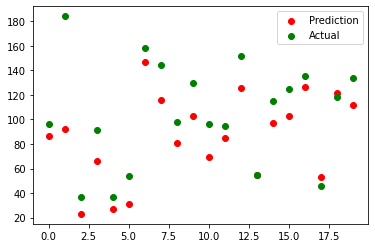

In [347]:
plt.scatter(range(len(x_test)),results,c = "r",label="Prediction")
plt.scatter(range(len(x_test)),y_test,c="g",label="Actual")
plt.legend()
plt.show()

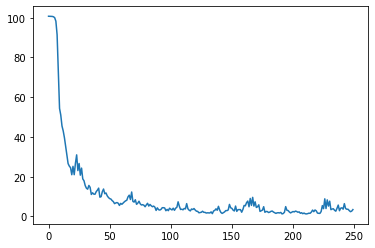

In [348]:
plt.plot(history.history["loss"])
plt.show()